<a href="https://colab.research.google.com/github/hj245668/trip_taxi/blob/main/20251014_2_taxiPJT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###이번 프로젝트에서 사용할 데이터 이름은 trip.csv입니다.
다양한 변수들을 활용하여 “택시 요금”을 예측한다는 가정하에 데이터를 정제해보세요.

지금까지 배운 내용을 최대한 활용하여 문제가 되는 부분을 찾아 정리하고,
최대한 변수들을 머신러닝 알고리즘에 활용 가능하도록 만들어봅시다.

In [21]:
# 필요 라이브러리 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("/content/drive/MyDrive/SQL_modu/trip.csv")

In [23]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [24]:
data.info()
# Q. info() 메서드를 사용하여 데이터 컬럼명과 자료형을 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [25]:
data.describe()
# Q. describe() 메서드를 사용하여 데이터 컬럼별 통계량을 확인합니다.

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [26]:
data.duplicated().sum()
# Q. 중복 데이터를 확인합니다.

np.int64(2)

In [27]:
data[data['passenger_name'] == '[[PASSENGER_NAME]]']
# Q. 중복 데이터를 확인합니다.
# 위에서 확인한 중복 데이터의 승객명을 [[PASSENGER_NAME]] 대신 넣어주세요.

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [29]:
print("중복 제거 전 행 개수:", len(data))
print("남은 중복 행 수:", data.duplicated().sum())

중복 제거 전 행 개수: 22701
남은 중복 행 수: 2


In [30]:
# Q. 중복 데이터를 제거합니다.

data = data.drop_duplicates()

In [32]:
print("중복 제거 후 행 개수:", len(data))
print("남은 중복 행 수:", data.duplicated().sum())

중복 제거 후 행 개수: 22699
남은 중복 행 수: 0


In [33]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [34]:
data.isna().sum()
# 결측치 확인

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [35]:
data.isna().mean().apply(lambda x : f"{x:.3f}%")
#data.isna().mean()
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.

,0
passenger_name,0.000%
tpep_pickup_datetime,0.000%
tpep_dropoff_datetime,0.000%
payment_method,0.000%
passenger_count,0.000%
trip_distance,0.000%
fare_amount,0.000%
tip_amount,0.000%
tolls_amount,0.000%


In [36]:
# 제거 전 데이터 복사
data_before = data.copy()

# 결측치 제거
data = data.dropna()

# 비교
print("제거 전 행 개수:", len(data_before))
print("제거 후 행 개수:", len(data))
print("제거된 행 개수:", len(data_before) - len(data))

제거 전 행 개수: 22699
제거 후 행 개수: 22696
제거된 행 개수: 3


In [37]:
data.isna().mean()

,0
passenger_name,0.0
tpep_pickup_datetime,0.0
tpep_dropoff_datetime,0.0
payment_method,0.0
passenger_count,0.0
trip_distance,0.0
fare_amount,0.0
tip_amount,0.0
tolls_amount,0.0


In [38]:
#======== passenger_count 컬럼의 이상치 제거
#-------- passenger_count 컬럼의 값을 기준으로 정렬합니다.

data['passenger_count'].sort_values()

,passenger_count
21754,0
21640,0
21218,0
20312,0
19458,0
...,...
21119,6
3867,6
3903,6
3878,6


<Axes: xlabel='None', ylabel='passenger_count'>

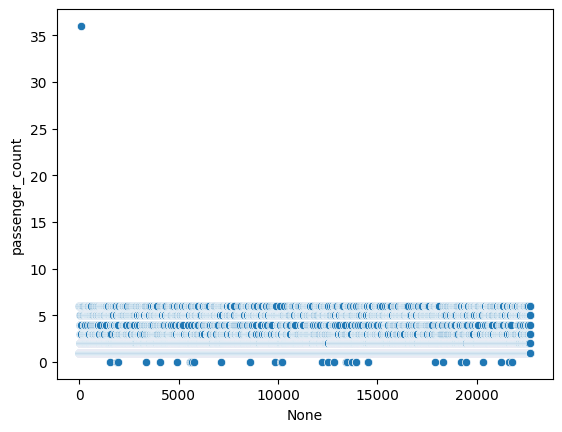

In [39]:
# passenger_count 값의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [40]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

data = data[data['passenger_count'] <= 6]

In [41]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

len(data[data['passenger_count'] == 0])

33

In [42]:
# passenger_count 컬럼의 이상치를 제거합니다.

data = data[data['passenger_count'] != 0]

<Axes: xlabel='None', ylabel='passenger_count'>

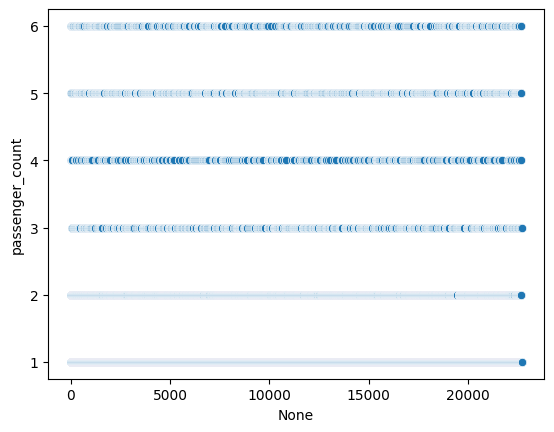

In [43]:
# passenger_count의 scatter plot을 다시 그려봅니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

<Axes: xlabel='None', ylabel='trip_distance'>

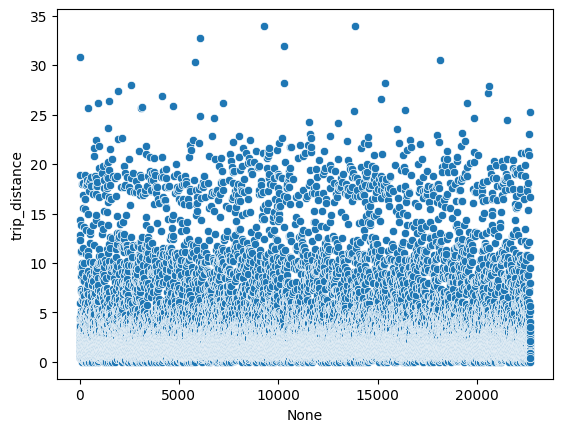

In [44]:
# Q. trip_distance의 이상치를 확인합니다.

# passenger_count 컬럼의 값을 기준으로 정렬
data['trip_distance'].sort_values()

sns.scatterplot(x = data.index, y = data['trip_distance'])

In [45]:
# 사분위수로 중심값 보기
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}, lower: {lower:.2f}, upper: {upper:.2f}")

IQR: 2.07, lower: -2.12, upper: 6.17


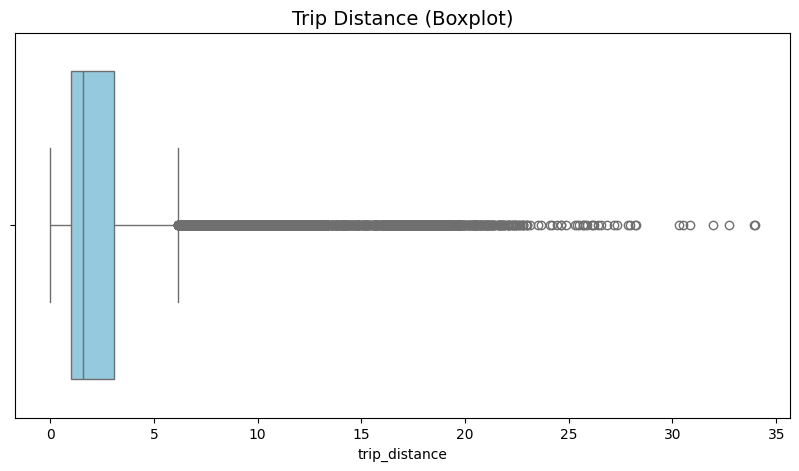

In [46]:
# boxplot으로 데이터 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['trip_distance'], color='skyblue')

plt.title('Trip Distance (Boxplot)', fontsize=14)
plt.xlabel('trip_distance')
plt.show()

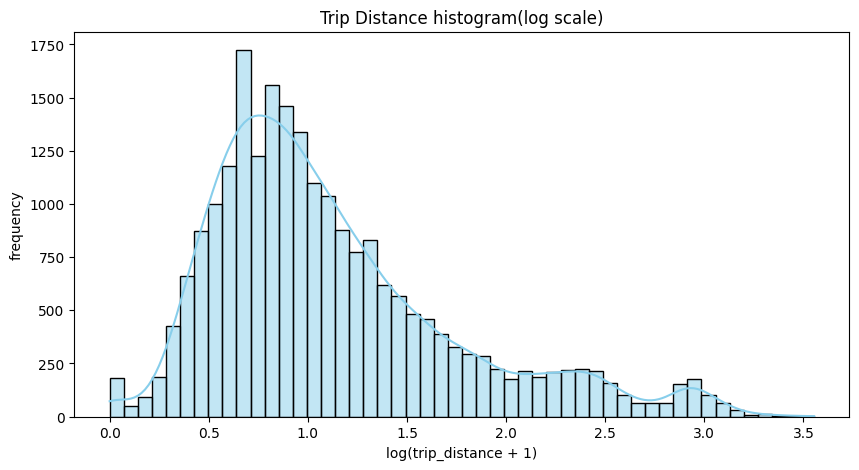

In [47]:
# histogram 으로 데이터 확인
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(data['trip_distance']), bins=50, kde=True, color='skyblue')
plt.title("Trip Distance histogram(log scale)")
plt.xlabel("log(trip_distance + 1)")
plt.ylabel("frequency")
plt.show()

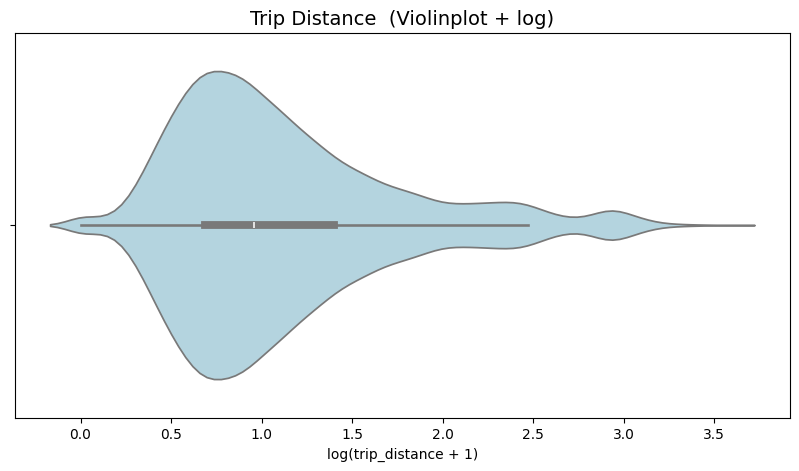

In [48]:
# Violinplot + log
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 5))
sns.violinplot(x=np.log1p(data['trip_distance']), color='lightblue')

plt.title("Trip Distance  (Violinplot + log)", fontsize=14)
plt.xlabel("log(trip_distance + 1)")
plt.show()

In [49]:
# Q. trip_distance의 이상치를 제거합니다.
data = data[data['passenger_count'] <= 6]

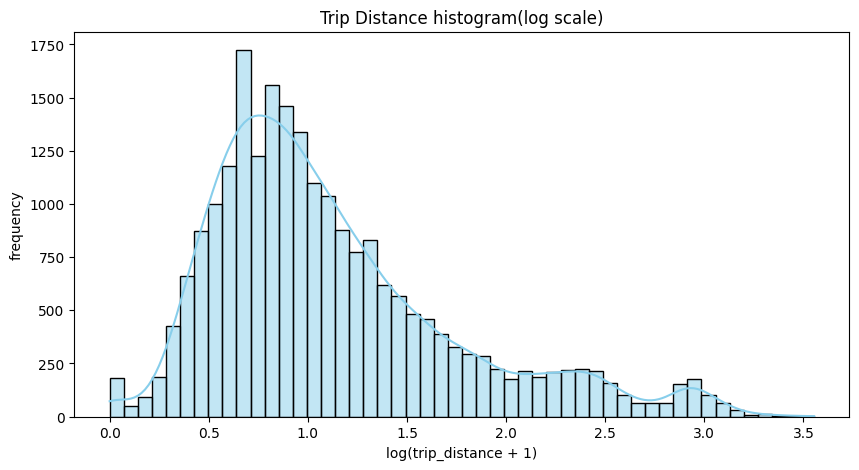

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(data['trip_distance']), bins=50, kde=True, color='skyblue')
plt.title("Trip Distance histogram(log scale)")
plt.xlabel("log(trip_distance + 1)")
plt.ylabel("frequency")
plt.show()

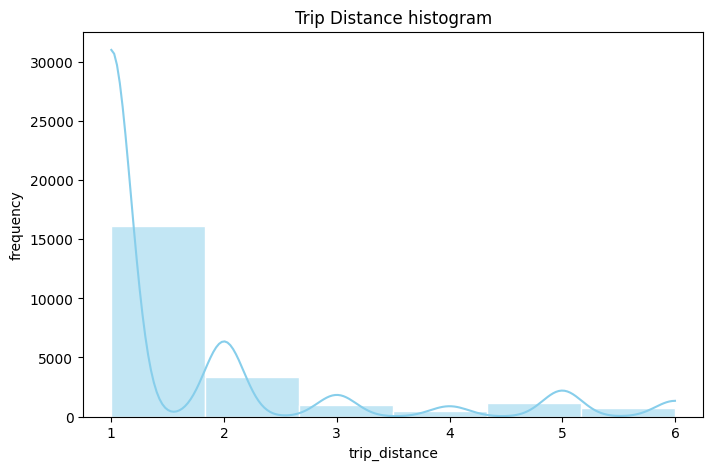

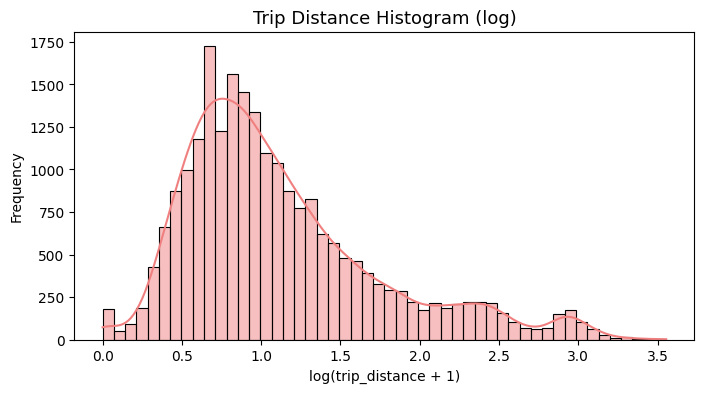

In [51]:
# Q. trip_distance의 히스토그램을 그립니다.

plt.figure(figsize=(8, 5))
sns.histplot(data['passenger_count'], bins=6, kde=True, color='skyblue', edgecolor='white')
plt.title("Trip Distance histogram")
plt.xlabel("trip_distance")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(data['trip_distance']), bins=50, kde=True, color='lightcoral')

plt.title('Trip Distance Histogram (log)', fontsize=13)
plt.xlabel('log(trip_distance + 1)')
plt.ylabel('Frequency')
plt.show()


In [52]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000
mean,1.644515,2.912906,13.021656,1.835007,0.312289
std,1.284378,3.652999,13.240673,2.801327,1.398898
min,1.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


In [54]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)

outlier_count = len(data[data['fare_amount'] <= 0])
print("이상치 개수:", outlier_count)

data[data['fare_amount'] <= 0].head()

이상치 개수: 20


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0


In [55]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.00,0.00,0.00
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.50,0.00,0.00
20700,Nicole Pierce,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,Cash,1,0.70,-4.50,0.00,0.00
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.00,0.00,0.00
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,200.00,11.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.00,450.00,0.00,0.00


In [56]:
# Q. fare_amount의 이상치를 제거합니다.
# fare_amount가 0보다 큰 값만 남기기 (택시 비용 지불 내역만, -를 이상치로 간주)

data = data[data['fare_amount'] > 0]

print("이상치 제거 후 남은 데이터 개수:", len(data))

이상치 제거 후 남은 데이터 개수: 22642


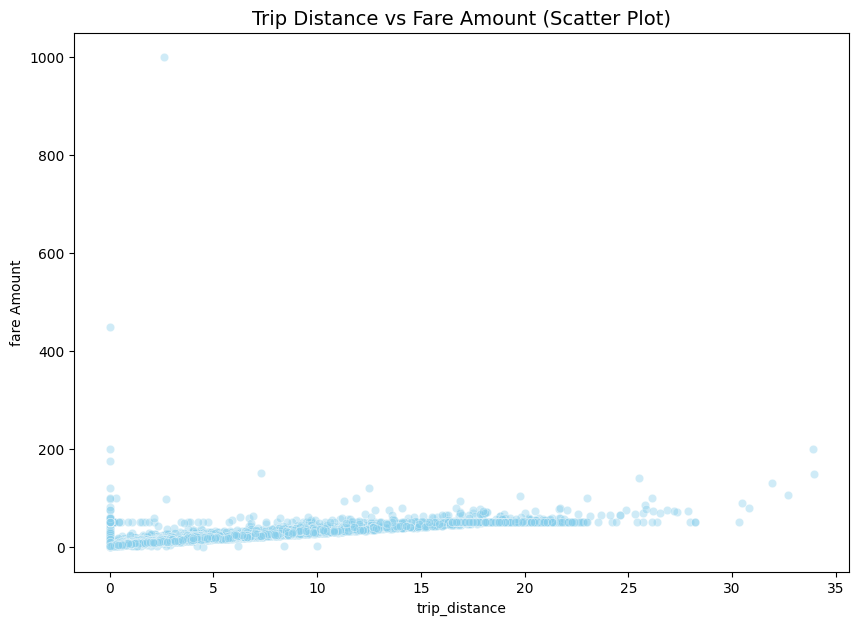

In [58]:
# Q. fare_amount의 scatter plot을 그립니다.

plt.figure(figsize=(10, 7))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data, alpha=0.4, color='skyblue')

plt.title('Trip Distance vs Fare Amount (Scatter Plot)', fontsize=14)
plt.xlabel("trip_distance")
plt.ylabel('fare Amount')
plt.show()

In [60]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.
# clipping
def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [61]:
data['fare_amount'].apply(fare_func)

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5
...,...
22696,4.0
22697,52.0
22698,4.5
22699,10.5


In [62]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [63]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.00,0.01,0.00,0.00
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.00,1.00,0.00,0.00
15348,Michael Ferguson,01/17/2017 1:18:24 PM,01/17/2017 1:18:31 PM,Debit Card,1,0.02,2.50,0.00,0.00
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.00,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,150.00,11.00,0.00
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,150.00,46.69,11.75


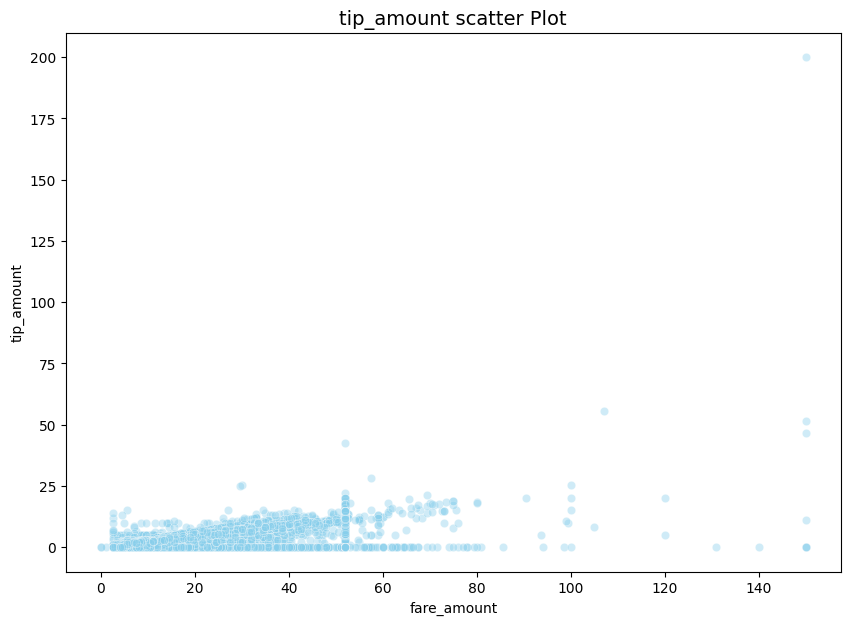

In [68]:
# Q. tip_amount의 scatter plot을 그립니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='fare_amount', y='tip_amount', data=data, alpha=0.4, color='skyblue')

plt.title('tip_amount scatter Plot', fontsize=14)
plt.xlabel('fare_amount')
plt.ylabel('tip_amount')
plt.show()

In [66]:
# Q. tip_amount의 이상치를 확인합니다.
# tip_amount가 0 이하이거나 fare_amount보다 클때

outliers_ta = data[(data['tip_amount'] <= 0) | (data['tip_amount'] > data['fare_amount'])]

print("tip_amount 이상치 개수:", len(outliers_ta))

print(outliers_ta[['fare_amount', 'tip_amount']].head())

tip_amount 이상치 개수: 8050
    fare_amount  tip_amount
4          16.5         0.0
8           9.0         0.0
18          9.5         0.0
19          5.0         0.0
21          6.5         0.0


In [67]:
# Q. tip_amount의 이상치를 제거합니다.
# tip_amount가 0 이하이거나 fare_amount보다 클때를 제외한 나머지 남김

data = data[(data['tip_amount'] > 0) | (data['tip_amount'] < data['fare_amount'])]

print("tip_amount 이상치 제거 후 :", len(data))

print(data[['fare_amount', 'tip_amount']].head())

tip_amount 이상치 제거 후 : 22642
   fare_amount  tip_amount
0         13.0        2.76
1         16.0        4.00
2          6.5        1.45
3         20.5        6.39
4         16.5        0.00


In [ ]:
len(data)

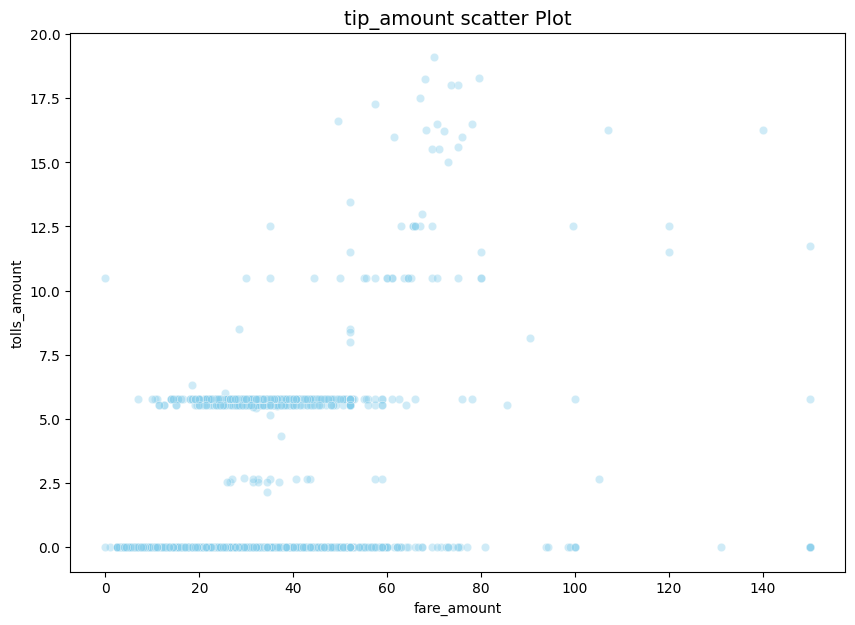

In [69]:
# # Q. tolls_amount의 scatter plot을 그립니다.

plt.figure(figsize=(10, 7))
sns.scatterplot(x='fare_amount', y='tolls_amount', data=data, alpha=0.4, color='skyblue')

plt.title('tip_amount scatter Plot', fontsize=14)
plt.xlabel('fare_amount')
plt.ylabel('tolls_amount')
plt.show()

### 범주형 데이터 전처리
결제 방법: Debit Card와 Credit Card를 Card로 통합합니다.

In [70]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [71]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [72]:
data['payment_method'].nunique()

3

In [73]:
data['payment_method'].value_counts()

,count
payment_method,
Cash,11168
Debit Card,5765
Credit Card,5709


In [77]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다.
# (힌트: replace() 메서드를 사용합니다.)

data['payment_method'] = data['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})

data['payment_method'].value_counts()

,count
payment_method,
Card,11474
Cash,11168


### 승객명: 성과 이름을 분리하여 성 부분만 저장해봅니다

In [79]:
example = 'Susan Robinson'

In [80]:
example.split()

['Susan', 'Robinson']

In [82]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.
data['passenger_first_name'] = data['passenger_name'].str.split().str[0]

data[['passenger_name', 'passenger_first_name']].head()

,passenger_name,passenger_first_name
0,Pamela Duffy,Pamela
1,Michelle Foster,Michelle
2,Tina Combs,Tina
3,Anthony Ray,Anthony
4,Brianna Johnson,Brianna


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22642 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22642 non-null  object 
 1   tpep_pickup_datetime   22642 non-null  object 
 2   tpep_dropoff_datetime  22642 non-null  object 
 3   payment_method         22642 non-null  object 
 4   passenger_count        22642 non-null  int64  
 5   trip_distance          22642 non-null  float64
 6   fare_amount            22642 non-null  float64
 7   tip_amount             22642 non-null  float64
 8   tolls_amount           22642 non-null  float64
 9   passenger_first_name   22642 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


In [87]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

print(data['tpep_pickup_datetime'].dtypes)

datetime64[ns]


In [88]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

print(data['tpep_dropoff_datetime'].dtypes)

datetime64[ns]


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22642 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22642 non-null  object        
 1   tpep_pickup_datetime   22642 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22642 non-null  datetime64[ns]
 3   payment_method         22642 non-null  object        
 4   passenger_count        22642 non-null  int64         
 5   trip_distance          22642 non-null  float64       
 6   fare_amount            22642 non-null  float64       
 7   tip_amount             22642 non-null  float64       
 8   tolls_amount           22642 non-null  float64       
 9   passenger_first_name   22642 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 2.4+ MB


In [90]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.

data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

print(data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'travel_time']].head())

  tpep_pickup_datetime tpep_dropoff_datetime     travel_time
0  2017-03-25 08:55:43   2017-03-25 09:09:47 0 days 00:14:04
1  2017-04-11 14:53:28   2017-04-11 15:19:58 0 days 00:26:30
2  2017-12-15 07:26:56   2017-12-15 07:34:08 0 days 00:07:12
3  2017-05-07 13:17:59   2017-05-07 13:48:14 0 days 00:30:15
4  2017-04-15 23:32:20   2017-04-15 23:49:03 0 days 00:16:43


In [91]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22642 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22642 non-null  object         
 1   tpep_pickup_datetime   22642 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22642 non-null  datetime64[ns] 
 3   payment_method         22642 non-null  object         
 4   passenger_count        22642 non-null  int64          
 5   trip_distance          22642 non-null  float64        
 6   fare_amount            22642 non-null  float64        
 7   tip_amount             22642 non-null  float64        
 8   tolls_amount           22642 non-null  float64        
 9   passenger_first_name   22642 non-null  object         
 10  travel_time            22642 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.6+ MB


### 보너스 (feature engineering 맛보기)

In [ ]:
data.head()

In [93]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

data[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].head()

,fare_amount,tip_amount,tolls_amount,total_amount
0,13.0,2.76,0.0,15.76
1,16.0,4.00,0.0,20.00
2,6.5,1.45,0.0,7.95
3,20.5,6.39,0.0,26.89
4,16.5,0.00,0.0,16.50


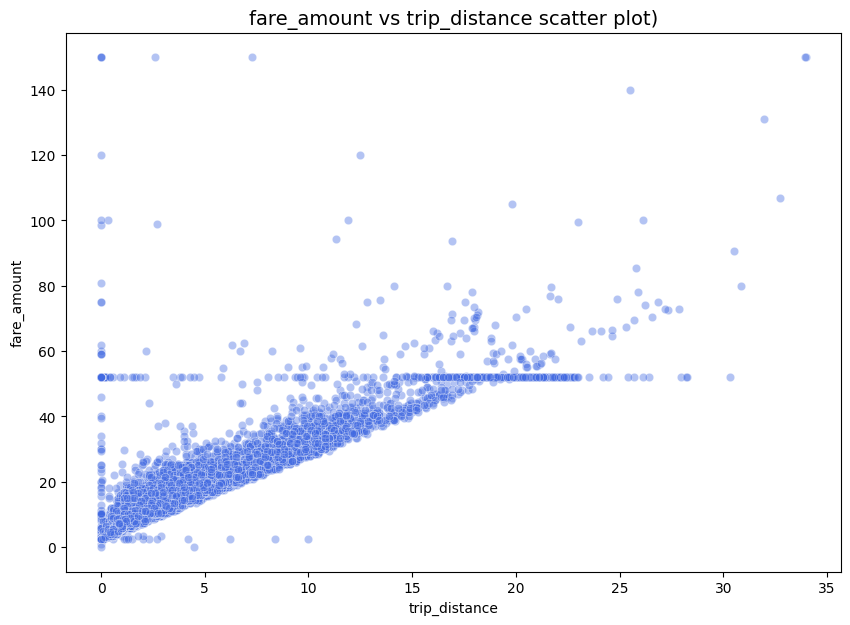

In [94]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.

plt.figure(figsize=(10, 7))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data, alpha=0.4, color='royalblue')

plt.title('fare_amount vs trip_distance scatter plot', fontsize=14)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.show()
# 해석 - 잛은 거리에서 요금 편차가 큼, 5~10 구간 선형 증가
# 이상치 - 거리 0인데 요금 높은 곳, 거리 25이상에서 요금이 낮은 곳

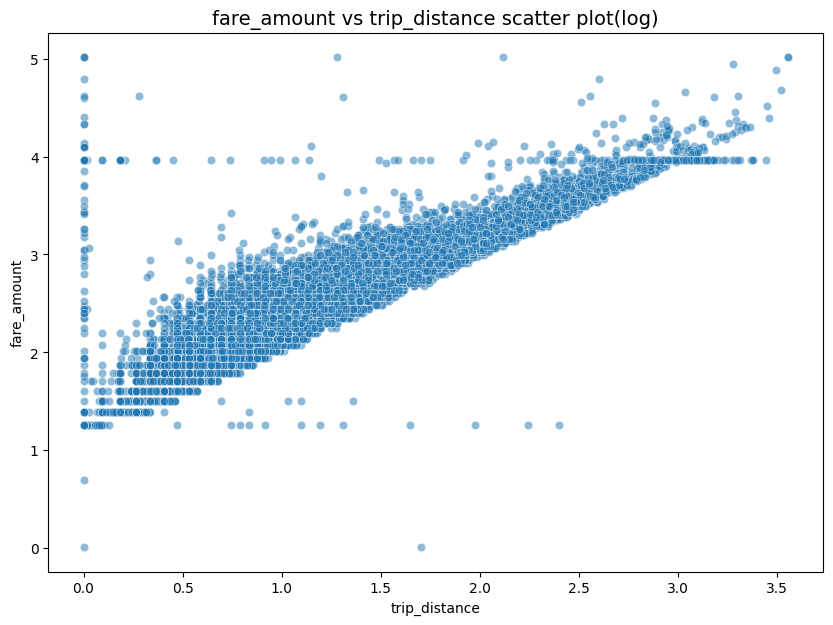

In [105]:
# scatter(log)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=np.log1p(data['trip_distance']), y=np.log1p(data['fare_amount']), alpha=0.5)
plt.title('fare_amount vs trip_distance scatter plot(log)', fontsize=14)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.show()

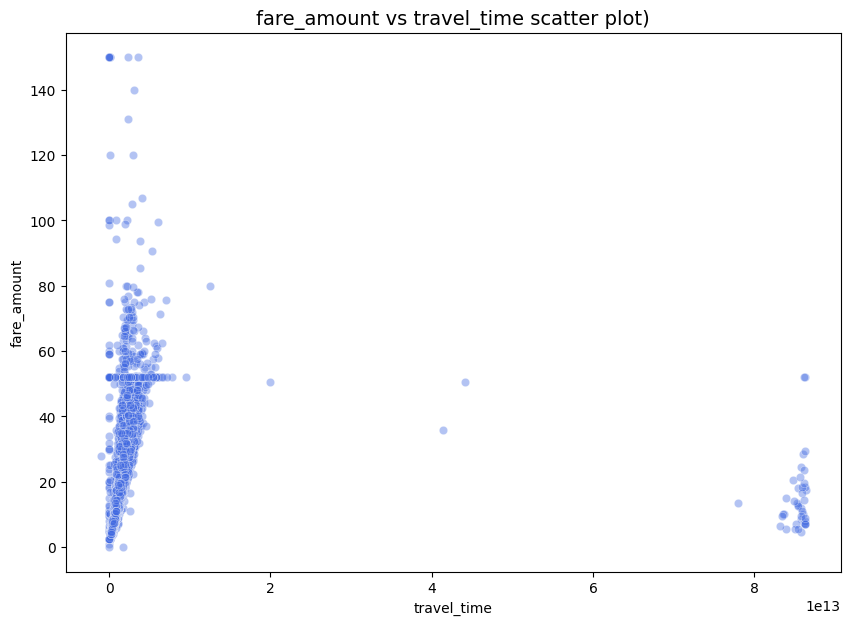

In [95]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현합니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='travel_time', y='fare_amount', data=data, alpha=0.4, color='royalblue')

plt.title('fare_amount vs travel_time scatter plot', fontsize=14)
plt.xlabel('travel_time')
plt.ylabel('fare_amount')
plt.show()

# 해석 - 0이하 제거(혹시 모를 이상값), 하단 쏠림:운행시간이 딻은데 비용차이가 큼(데이터 입력 오류 가능성?), 4시간 이상 에서 운영요금이 너무 적음 (이상치)

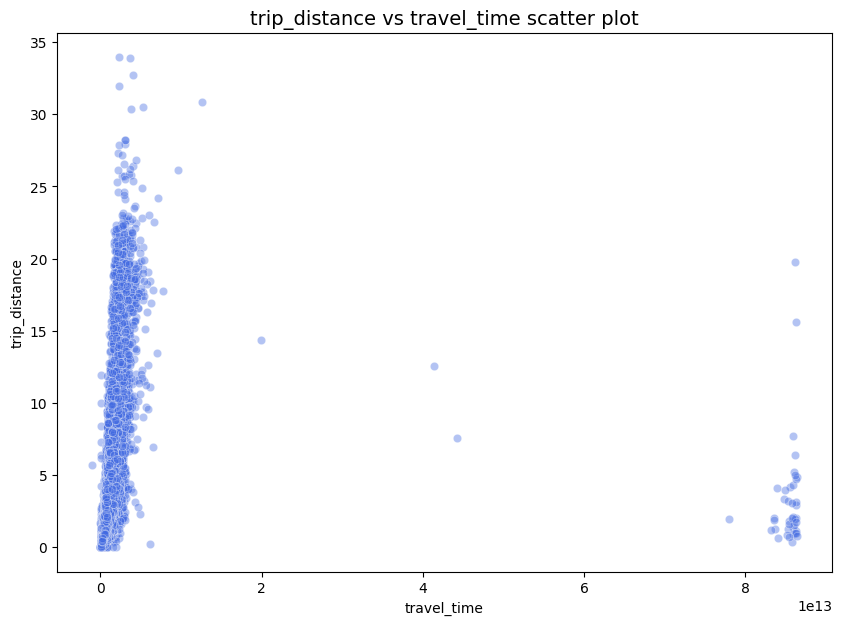

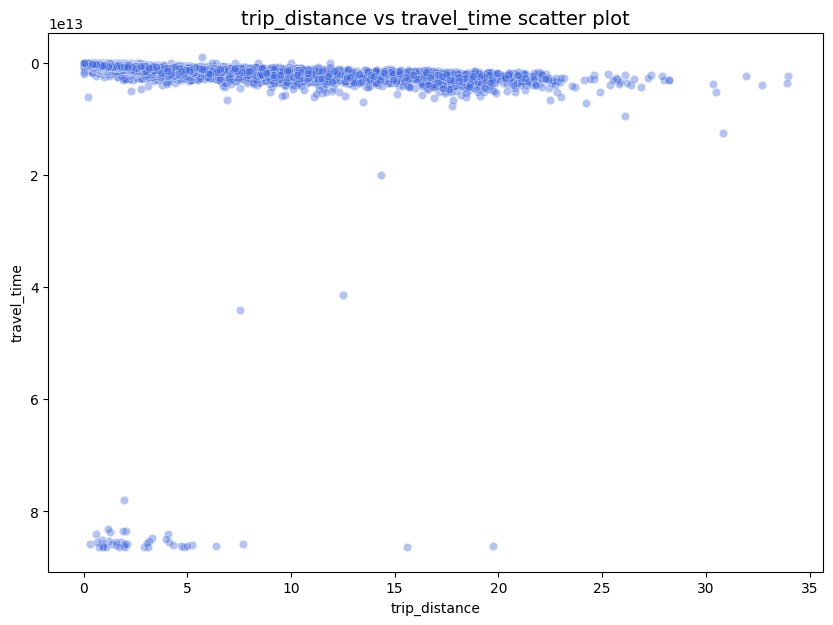

In [98]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='travel_time', y='trip_distance', data=data, alpha=0.4, color='royalblue')

plt.title('trip_distance vs travel_time scatter plot', fontsize=14)
plt.xlabel('travel_time')
plt.ylabel('trip_distance')
plt.show()

# : 해석 - 짧은 시간 분포에 운영거리가 다양함.-> 일정 거리 이상 운임 요금이 고정일 가능성이 있음

plt.figure(figsize=(10, 7))
sns.scatterplot(x='trip_distance', y='travel_time', data=data, alpha=0.4, color='royalblue')

plt.title('trip_distance vs travel_time scatter plot', fontsize=14)
plt.xlabel('trip_distance')
plt.ylabel('travel_time')
plt.show()

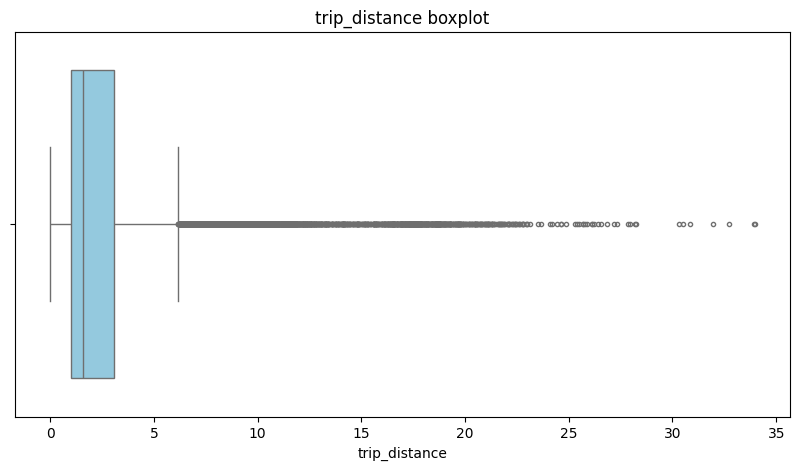

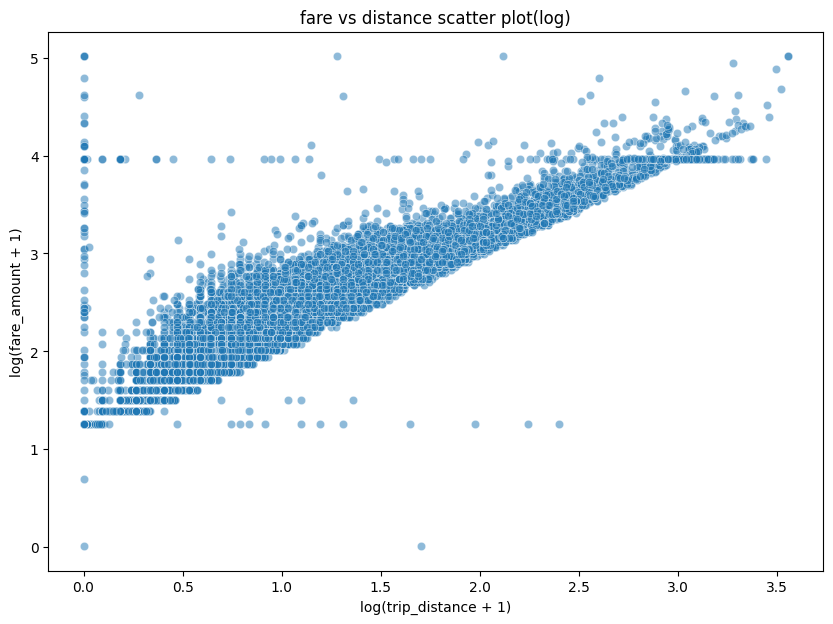

In [103]:
# 이상치 탐색 그래프
# 거리 이상치 탐색

# 박스플롯
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['trip_distance'], color='skyblue', fliersize=3)
plt.title("trip_distance boxplot")
plt.show()


### 이상치 제거 전
### 택시 데이터에 대한 이상치 정의에 대한 판단
#### 택시는 일정 거리를 승객을 태우고 이동하고 그에 해당하는 운임과 팁을 받아서 운영이됨.
#### 고려요인 : 단거리, 중거리, 장거리 등 운영 범위에 대한 범주가 있음 (시내외, 특수, 타다와 같은... )
#### 산점도와 히스토그램에서 이상치 결측치를 이론적으로 제외하고 보고자하는 내용이 무엇이지 확인,
#### 본 이상치 제거 기준
###### 운영 거리와 운임이 선형 분포를 이루는 데이터를 중심으로 그 외 데이터는 이상치로 보고 제거
###### 운영 거리와 운임이 선형 분포를 이루는 것을 정상적 운영이라고 정의함. 그외는 제외하고 데이터를 보고자 함.

이상치 제거 개수 : 1041개 
남은 데이터 수: 21601개


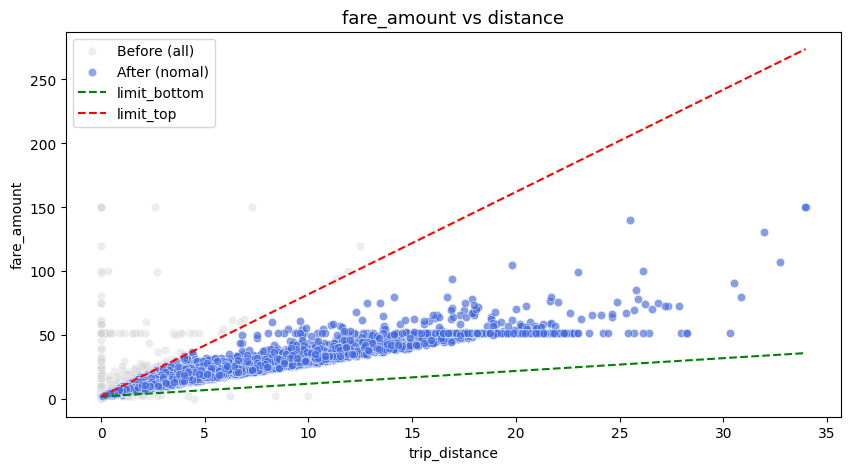

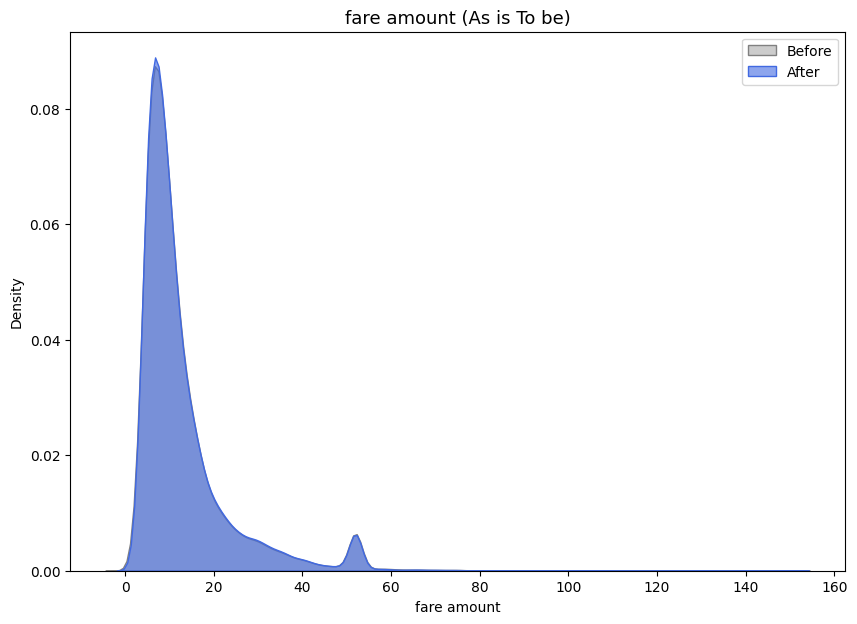

In [110]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.
# 선형 분포의 중심 영역(정상 택시 요금 패턴)을 기준으로,
# 일정 거리 이내의 데이터만 정상으로 간주하고 나머지를 이상치로 제거
# 택시 요금과 이동 거리간 비례관계에 있는 데이터를 정상 데이터로 보고
# 회귀선 기반 이상치를 제거하고자 함

# --------------------------------------------
# 거리당 요금 범위 설정
lower_slope = 1.0   # 하한 요금 (거리당 $1.0 미만)
upper_slope = 8.0   # 상한 요금 (거리당 $8 초과)
base_fare   = 2.0   # 기본 요금

# 정상 구간 데이터 필터링
data_clean = data[
    (data['fare_amount'] >= base_fare + lower_slope * data['trip_distance']) &
    (data['fare_amount'] <= base_fare + upper_slope * data['trip_distance'])
]

print(f"이상치 제거 개수 : {len(data) - len(data_clean)}개 ")
print(f"남은 데이터 수: {len(data_clean)}개")

# 시각화
plt.figure(figsize=(10, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data,
                color='lightgray', label='Before (all)', alpha=0.4)
sns.scatterplot(x='trip_distance', y='fare_amount', data=data_clean,
                color='royalblue', label='After (nomal)', alpha=0.6)

# 선형 범위선 표시
x_vals = np.linspace(0, data['trip_distance'].max(), 100)
plt.plot(x_vals, base_fare + lower_slope * x_vals, color='green', linestyle='--', label='limit_bottom')
plt.plot(x_vals, base_fare + upper_slope * x_vals, color='red', linestyle='--', label='limit_top')

plt.title('fare_amount vs distance', fontsize=13)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.legend()
plt.show()

# --histogram
plt.figure(figsize=(10,7))
sns.kdeplot(data['fare_amount'], label='Before', fill=True, color='gray', alpha=0.4)
sns.kdeplot(data_clean['fare_amount'], label='After', fill=True, color='royalblue', alpha=0.6)

plt.title('fare amount (As is To be)', fontsize=13)
plt.xlabel('fare amount')
plt.legend()
plt.show()

In [111]:
# 이상치 제거 데이터를 최종 화일로 저장
# 이상치 제거된 데이터 저장
output_path = "/content/drive/MyDrive/SQL_modu/trip_clean.csv"

data_clean.to_csv(output_path, index=False, encoding='utf-8-sig')

print("이상치 제거 데이터 저장(trip_clean.csv)")
print(f"저장 위치: {output_path}")
print(f"남은 데이터 수: {len(data_clean)}개")
print(f"이상치 수(제거): {len(data) - len(data_clean)}개")


이상치 제거 데이터 저장(trip_clean.csv)
저장 위치: /content/drive/MyDrive/SQL_modu/trip_clean.csv
남은 데이터 수: 21601개
이상치 수(제거): 1041개
